In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../my_data/eda.csv")

In [3]:
data.columns

Index(['area', 'majoraxislength', 'minoraxislength', 'eccentricity',
       'convexarea', 'equivdiameter', 'extent', 'perimeter', 'roundness',
       'aspectration', 'class'],
      dtype='object')

**Checking for extreme skewness**

In [4]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

In [5]:
data['class'].dtype

dtype('O')

In [17]:
num = data.select_dtypes(exclude=np.object).columns.tolist()
print(num)
print(len(num))

['area', 'majoraxislength', 'minoraxislength', 'eccentricity', 'convexarea', 'equivdiameter', 'extent', 'perimeter', 'roundness', 'aspectration']
10


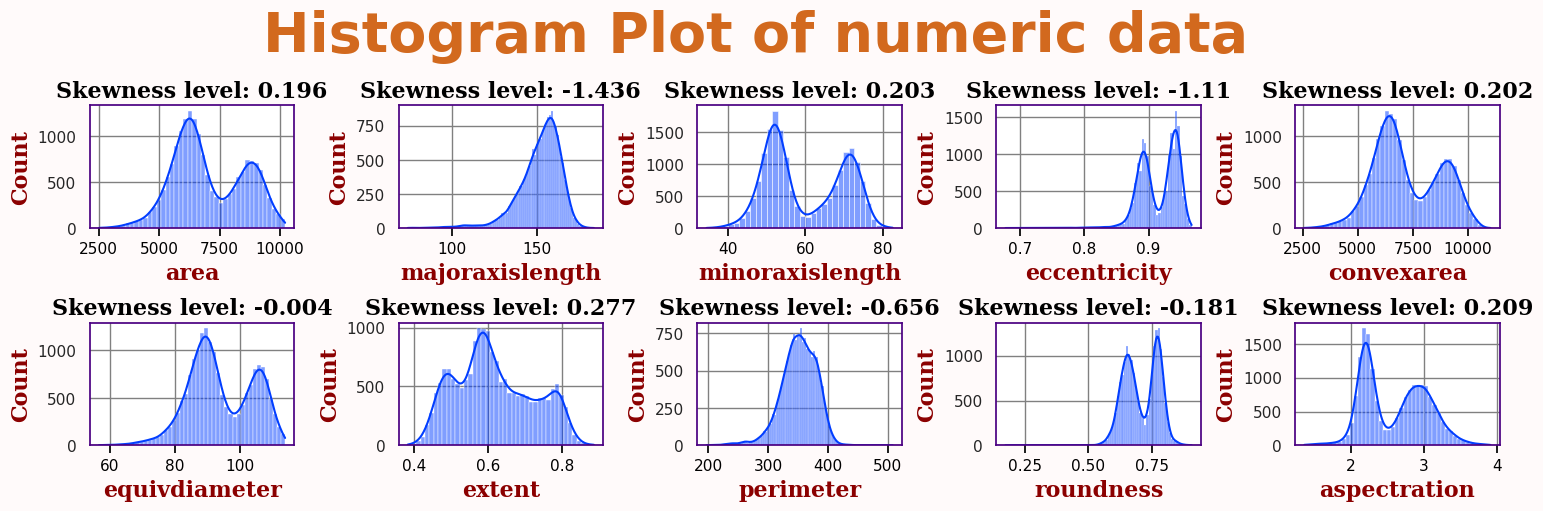

In [20]:
fig,ax = plt.subplots(2,5, figsize=(15,5),constrained_layout=True)
ax = ax.ravel() 
sns.set_theme(style='whitegrid',rc=rc,palette='bright')

for index, value in enumerate(num):
    sns.histplot(data=data,x=value,ax=ax[index],kde=True)
    
    ax[index].set_title(f'Skewness level: {np.around(data[value].skew(axis=0),3)}',
                            fontdict=font_title)

    ax[index].set_xlabel(f'{value}', fontdict=font_label)
    ax[index].set_ylabel("Count",fontdict=font_label)

    fig.suptitle(f"Histogram Plot of numeric data",
                fontdict=font_fig,fontsize=40,fontweight='bold')

Apply log transformation to major axis length and eccentricity to address skewness.

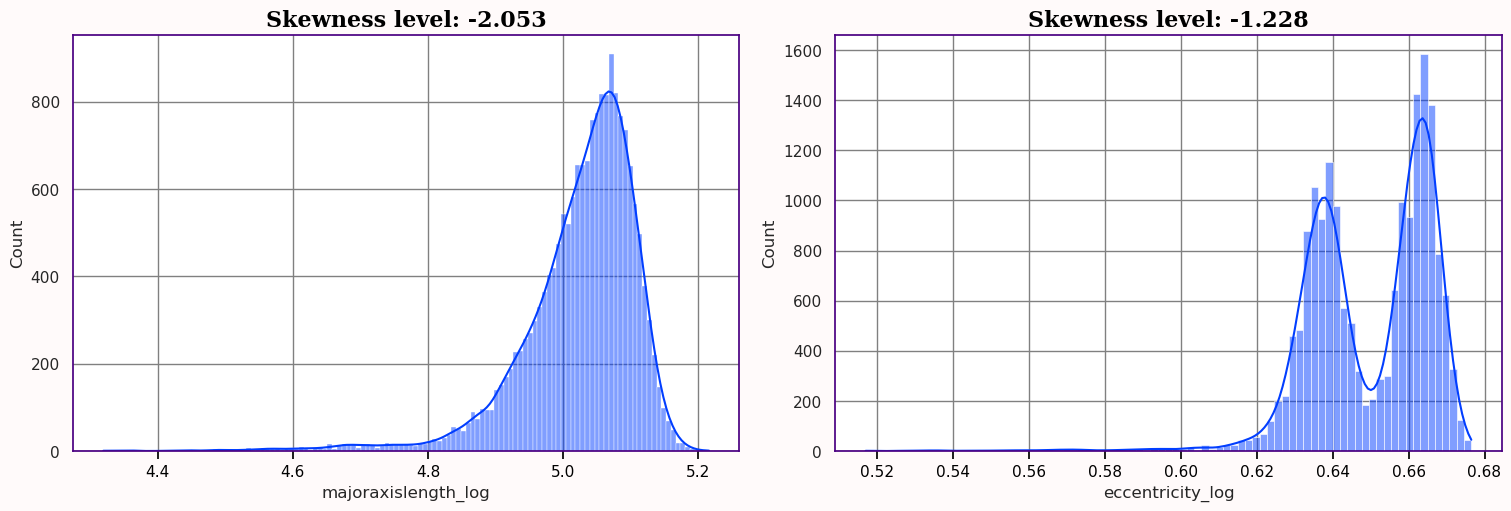

In [8]:
to_log = ["majoraxislength","eccentricity"]

log_data = data[to_log]

fig,ax = plt.subplots(1,2, figsize=(15,5),constrained_layout=True)
ax = ax.ravel()
sns.set_theme(style='whitegrid',rc=rc,palette='bright')

for index, value in enumerate(log_data.columns):
    log = (f"{value}_log")
    log_data[log] = log_data[value].apply(lambda x:np.log1p(x))
    sns.histplot(x=log,data=log_data,
                ax=ax[index],kde=True)
    ax[index].set_title(f'Skewness level: {np.around(log_data[log].skew(axis=0),3)}',
                        fontdict=font_title)


No improvements. try IQR treatment

In [10]:
log_data[:5]

,majoraxislength,eccentricity,majoraxislength_log,eccentricity_log
0,92.229,0.720,4.535059,0.542324
1,74.692,0.726,4.326672,0.545807
2,76.293,0.731,4.347603,0.548699
3,77.034,0.739,4.357145,0.553310
4,85.125,0.749,4.455800,0.559044


In [11]:
log_data.shape

(18185, 4)

In [12]:
iqr_data = log_data[to_log]
Q1 = iqr_data.majoraxislength.quantile(0.25)
Q3 = iqr_data.majoraxislength.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5* IQR)
upper_bound = Q3 + (1.5* IQR)
IQR_treat = ((iqr_data.majoraxislength < lower_bound)|(iqr_data.majoraxislength > upper_bound))
iqr_data = iqr_data[~IQR_treat]
iqr_data.shape

(17647, 2)

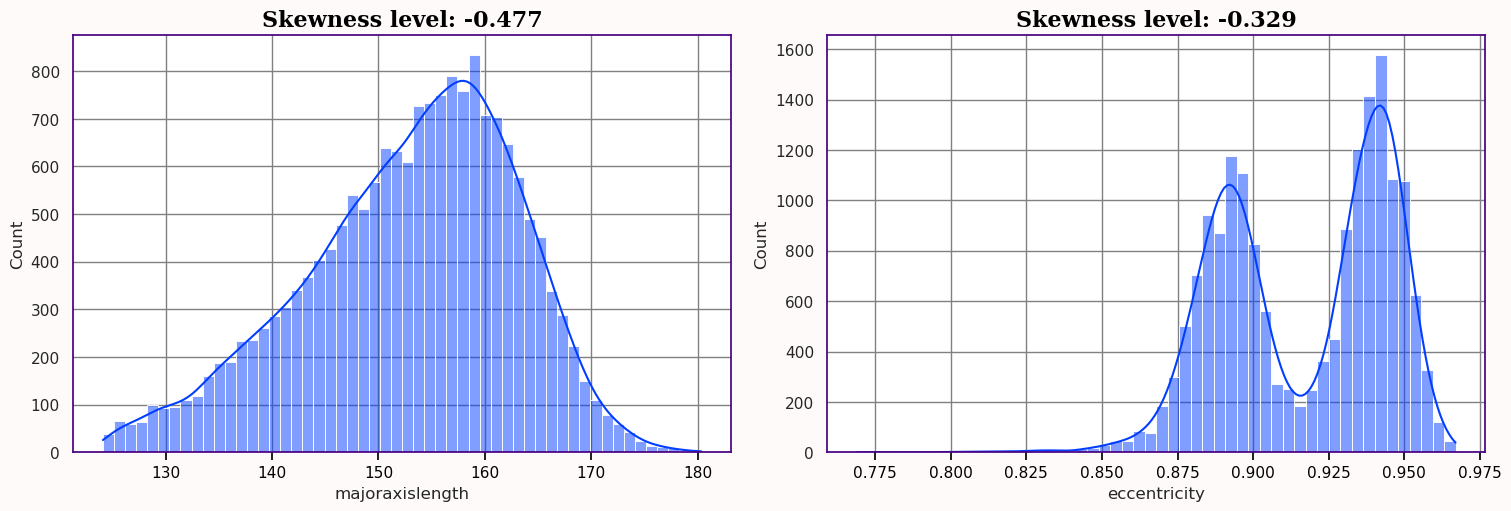

In [13]:
fig,ax = plt.subplots(1,2, figsize=(15,5),constrained_layout=True)
ax = ax.ravel()
sns.set_theme(style='whitegrid',rc=rc,palette='bright')

for index, value in enumerate(iqr_data.columns):
    sns.histplot(x=value,data=iqr_data,
                ax=ax[index],kde=True)
    ax[index].set_title(f'Skewness level: {np.around(iqr_data[value].skew(axis=0),3)}',
                        fontdict=font_title)

Proceed with IQR treatment using major axis length

In [15]:
data_copied = data.copy()
data_copied.head()

,area,majoraxislength,minoraxislength,eccentricity,convexarea,equivdiameter,extent,perimeter,roundness,aspectration,class
0,4537,92.229,64.013,0.720,4677,76.005,0.658,273.085,0.765,1.441,jasmine
1,2872,74.692,51.400,0.726,3015,60.471,0.713,208.317,0.832,1.453,jasmine
2,3048,76.293,52.043,0.731,3132,62.296,0.759,210.012,0.868,1.466,jasmine
3,3073,77.034,51.928,0.739,3157,62.551,0.784,210.657,0.870,1.483,jasmine
4,3693,85.125,56.374,0.749,3802,68.572,0.769,230.332,0.875,1.510,jasmine


In [16]:
data_copied.shape

(18185, 11)

In [18]:
Q1 = data_copied.majoraxislength.quantile(0.25)
Q3 = data_copied.majoraxislength.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5* IQR)
upper_bound = Q3 + (1.5* IQR)
IQR_treat = ((data_copied.majoraxislength < lower_bound)|(data_copied.majoraxislength > upper_bound))
data_copied = data_copied[~IQR_treat]
data_copied.shape

(17647, 11)

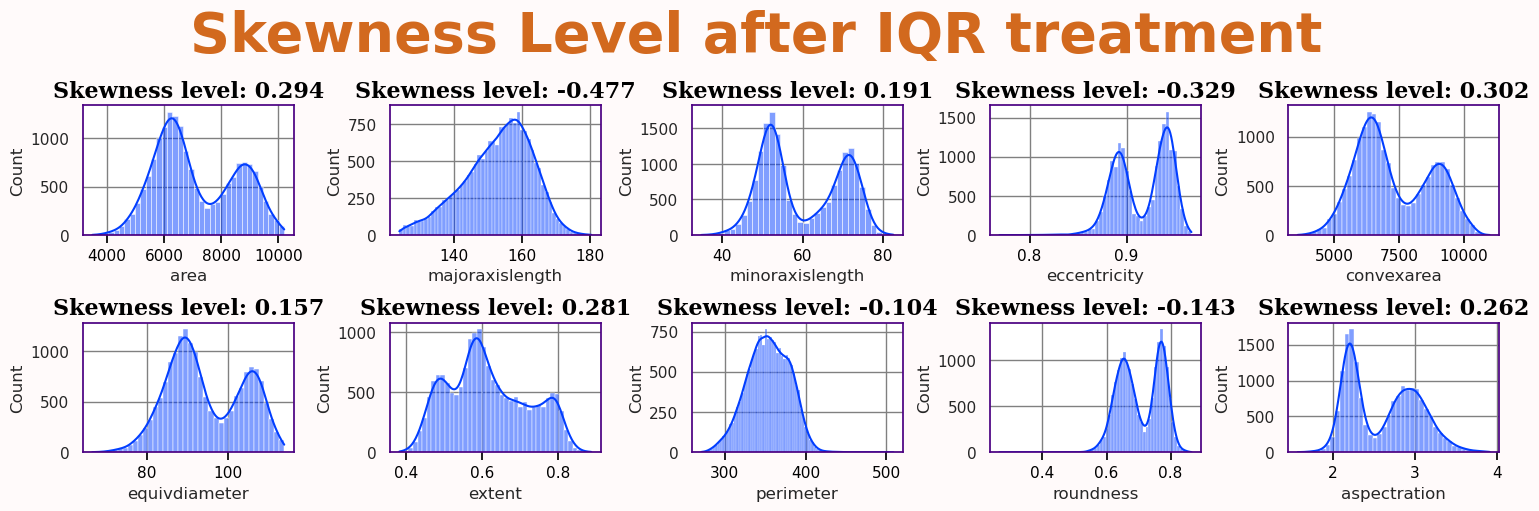

In [19]:
fig,ax = plt.subplots(2,5, figsize=(15,5),constrained_layout=True)
ax = ax.ravel()
sns.set_theme(style='whitegrid',rc=rc,palette='bright')

for index, value in enumerate(num):
    sns.histplot(x=value,data=data_copied,
                ax=ax[index],kde=True)
    ax[index].set_title(f'Skewness level: {np.around(data_copied[value].skew(axis=0),3)}',
                        fontdict=font_title)

    fig.suptitle(f"Skewness Level after IQR treatment",
            fontdict=font_fig,fontsize=40,fontweight='bold')

The trade-off is quite great using the IQR. 


In [21]:
data_copied.to_csv("../my_data/outlier_treat.csv",index=False)